In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('moore.csv', header=None).values
data.shape

(162, 2)

In [3]:
X = data[:,0].reshape(-1, 1)
Y = data[:,1]

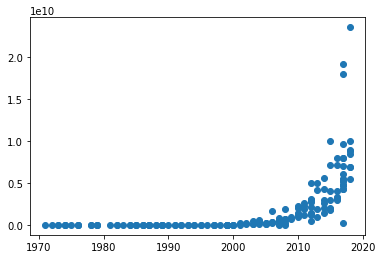

In [4]:
plt.scatter(X, Y)

In [5]:
Y = np.log(Y)

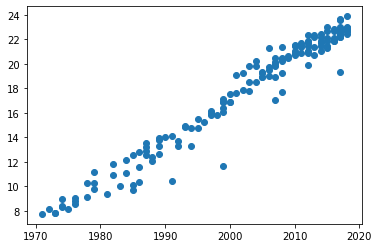

In [6]:
plt.scatter(X, Y)

In [7]:
X = X - X.mean()

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

model.compile(
    optimizer=tf.keras.optimizers.SGD(0.001,0.9),
    loss='mse'
)

def schedule(epoch, lr):
    if epoch >= 50:
        return 0.0001
    return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

hist = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Train on 162 samples
Epoch 1/200
162/162 [==============================] - 0s 2ms/sample - loss: 373.5022
Epoch 2/200
162/162 [==============================] - 0s 62us/sample - loss: 495.1797
Epoch 3/200
162/162 [==============================] - 0s 74us/sample - loss: 247.6461
Epoch 4/200
162/162 [==============================] - 0s 49us/sample - loss: 202.7530
Epoch 5/200
162/162 [==============================] - 0s 56us/sample - loss: 190.3143
Epoch 6/200
162/162 [==============================] - 0s 62us/sample - loss: 173.5729
Epoch 7/200
162/162 [==============================] - 0s 56us/sample - loss: 122.2869
Epoch 8/200
162/162 [==============================] - 0s 49us/sample - loss: 81.2775
Epoch 9/200
162/162 [==============================] - 0s 56us/sample - loss: 69.1132
Epoch 10/200
162/162 [==============================] - 0s 62us/sample - loss: 53.4388
Epoch 11/200
162/162 [==============================] - 0s 62us/sample - loss: 30.4323
Epoch 12/200
162/162 [===

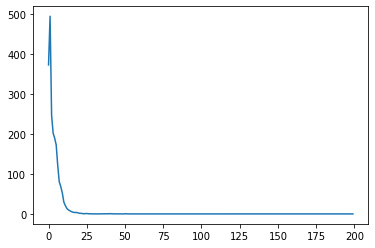

In [9]:
plt.plot(hist.history['loss'], label='loss')

In [10]:
print(model.layers)

In [11]:
print(model.layers[0].get_weights())

[array([[0.34487072]], dtype=float32), array([17.762955], dtype=float32)]


In [12]:
a = model.layers[0].get_weights()[0][0,0]

In [13]:
a

0.34487072

In [14]:
print('Time to double: ', np.log(2)/a)

Time to double:  2.00987543369694


In [15]:
x = np.array(X).flatten()
y = np.array(Y)
denominator = x.dot(x) - x.mean() * x.sum()
a = (x.dot(y) - y.mean() * y.sum()) / denominator
b = (y.mean() * x.dot(x) - x.mean() * x.dot(y)) / denominator
print(a, b)
print('Time to double:', np.log(2)/a)

-1.3527107481179055 17.764939393631764
Time to double: -0.5124134494564754


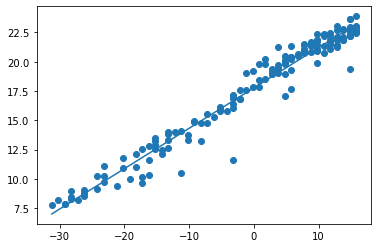

In [16]:
Yhat = model.predict(X).flatten()
plt.scatter(X, Y)
plt.plot(X, Yhat)

In [18]:
# manual cal
weights, bias = model.layers[0].get_weights()
X = X.reshape(-1,1)
Yhat2 = (X.dot(weights) + bias).flatten()
np.allclose(Yhat, Yhat2) # Compare 2 floats, which means predict and manual cal is the same

True

In [19]:
model.save('logistic_regression.h5')

In [21]:
model = tf.keras.models.load_model('logistic_regression.h5')
print(model.layers)
weights, bias = model.layers[0].get_weights()
X = X.reshape(-1,1)
Yhat2 = (X.dot(weights) + bias).flatten()
np.allclose(Yhat, Yhat2)

True